# Simple Linear Regression with sklearn
Module 1 | Chapter 1 | Notebook 2

***
In this notebook we will use our first machine learning model: a simple linear regression. It predicts continuous values using a straight line. In our case, we will be predicting house prices. By the end of this lesson you will be able to:
* Use the Python module `sklearn`
* Predict prices with linear regression models
* Interpret regression parameters
***


## Training a model


**Scenario:** A Taiwanese investor comes to you to find out how much his properties in Taiwan are actually worth. He might want to resell them. Two of the houses are brand new. The other houses are 12, 13.3, 34, 3, 15, 27.5, 11 and 7 years old. How much are these houses worth?


Import `pandas` with its conventional alias `pd`, import the training data which is located in *Taiwan_real_estate_training_data.xlsx* and store it in a `DataFrame` named `df` and use the `'No'` column for row names. Rename the columns to the following column names:

```python
['house_age', 
 'metro_distance', 
 'number_convenience_stores', 
 'number_parking_spaces',
 'air_pollution',
 'light_pollution',
 'noise_pollution',
 'neighborhood_quality',
 'crime_score',
 'energy_consumption',
 'longitude', 
 'price_per_ping']
 ```

Then add another column `'price_per_m2'` where the values are the values from the `'price_per_ping'` column divided by 3.3.


In [36]:
import pandas as pd

df = pd.read_excel('Taiwan_real_estate_training_data.xlsx', index_col='No')
df.head()

col_names = ['house_age', 
             'metro_distance', 
             'number_convenience_stores', 
             'number_parking_spaces',
             'air_pollution',
             'light_pollution',
             'noise_pollution',
             'neighborhood_quality',
             'crime_score',
             'energy_consumption',
             'longitude', 
             'price_per_ping']

df.columns = col_names

df.loc[:,'price_per_m2'] = df.loc[:,'price_per_ping']/3.3
df.head()

,house_age,metro_distance,number_convenience_stores,number_parking_spaces,air_pollution,light_pollution,noise_pollution,neighborhood_quality,crime_score,energy_consumption,longitude,price_per_ping,price_per_m2
No,,,,,,,,,,,,,
1,32.0,84.87882,10,89,29.754370,197.289414,0.852160,0.348743,0.593276,77.636034,121.54024,37.9,11.484848
2,19.5,306.59470,9,99,111.751859,179.272296,11.394151,0.279919,0.679967,96.182066,121.53951,42.2,12.787879
3,13.3,561.98450,5,79,394.335266,310.258310,13.691476,0.518158,0.585334,84.704896,121.54391,47.3,14.333333
4,13.3,561.98450,5,82,411.776028,273.979285,7.798633,0.431828,0.785321,66.828633,121.54391,54.8,16.606061
5,5.0,390.56840,5,72,98.966440,223.585153,12.628267,0.371121,0.752676,76.754044,121.54245,43.1,13.060606


The data dictionary for this data is as follows:

Column number | Column name       | Type      | Description
 ------------ | ---     | :---------:           | ------------:
0              | `'house_age'` | continuous (`float`) | age of the house in years
1              | `'metro_distance'` | continuous (`float`) | distance in meters to the next metro station
2              | `'number_convenience_stores'` | continuous (`int`) | Number of convenience stores nearby
3              | `'number_parking_spaces'` | continuous (`int`) | Number of parking spaces nearby
4              | `'air_pollution'` | continuous (`float`) | Air pollution value near the house
5              | `'light_pollution'` | continuous (`float`) | Light pollution value near the house
6              | `'noise_pollution'` | continuous (`float`) | Noise pollution value near the house
7              | `'neighborhood_quality'` | continuous (`float`) | average quality of life in the neighborhood
8              | `'crime_score'` | continuous (`float`) | crime score according to police
9              | `'energy_consumption'` | continuous (`float`) | The property's energy consumption
10              | `'longitude'` | continuous (`float`) | The property's longitude
11              | `'price_per_ping'` | continuous (`float`) | House price in Taiwan dollars per ping, one ping is 3.3 m²
12              | `'price_per_m2'` | continuous (`float`) | House price in Taiwan dollars per m²


The Python module `sklearn` offers a wide range of machine learning algorithms and supporting functionalities. That is why it has become established among data scientists as the best all-rounder among the Python modules for machine learning. If you want to organize or predict data using a machine learning model, you go through five steps. Don't worry, you might not understand all the steps just yet. That's ok. You will know more by the end of this lesson.

1. Choose model type
2. Instantiate a model with certain settings known as hyperparameters
3. Organize data into a feature matrix and target vector
4. Model fitting
5. Make predictions with the trained model


**Congratulations:** We will go through these five steps many times throughout this course. In general, creating a machine learning model is an iterative process. Usually you will go through the five steps several times in one project. Now you have an idea of what lies ahead in this lesson. Take a deep breath before we take the first step.


## 1. Choose model type 
Let's start right away with the first step: choosing a model type. We want to predict continuous data, in this case house prices. This means we need a regression model. There are different algorithms available. We will use one of them, linear regression, as an example in this chapter.

Linear regression is very popular in the business world because a) it's very flexible, b) it can be fitted to data fairly quickly and, above all, c) it generates interpretable parameters. We will see exactly how to interpret the parameters later in this lesson. 

Now let's look at the first step: Choose the model type.
Unlike with `pandas`, it's common to import functions directly from the `sklearn` module. For this we use the following syntax:
```python
from module_name import function_name
```
`LinearRegression` represents the linear regression model type and is located in the `sklearn.linear_model` module. Import `LinearRegression` directly.


In [2]:
from sklearn.linear_model import LinearRegression

**Congratulations:** You have selected the model type. In this case it was already decided for you. When working as a data scientist, you often try out different ones and select the best model type. Let's continue with the linear regression and determine the hyperparameters.


## 2. Instantiate the model with certain hyperparameters


Now we have already decided on a model type and can turn to step 2: instantiating the model with certain settings, what we call hyperparameters. Hyperparameters specify exactly what the model should look like. The [official `sklearn` documentation on `LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) shows a possible hyperparameter: whether the intercept of the model should be learned (fitted) (`fit_intercept=True`) or specified (`fit_intercept=False`).

To understand what this is all about, we have to look at how linear regression works. Visually, we can imagine a simple linear regression like this. There is one data series in `feature` and another data series in `target`. In a scatter diagram with made up values that have nothing to do with the Taiwanese real estate investor, they would look like this:

![scatter plot](01_01_01_pic1_en.png)


A simple linear regression now tries to find a line where the average distance to the points is as small as possible.

![scatter plot with regression line](01_01_01_pic2_en.png)


You can imagine the distances as vertical lines between the dark blue dots and the light blue line. In the following scatter diagram we have drawn them in red.

![regression line with residuals](01_01_01_pic2b_en.png)


These red vertical lines should be as short as possible on average. More precisely, the squared average length of the vertical lines should be as short as possible. Or to express it with a formula, you would try to minimize $error$:


<table>
    <tr><th>Word formula</th>
        <th>math. Formula</th>
    </tr>
<tr>
<td>
\begin{equation*}
error = \sum (Target_{measured} - Target_{predicted})^2
\end{equation*}
    </td>
<td>
\begin{equation*}
Error = \sum_{i=1}^n (y_i - f(x_i))^2 
\end{equation*}    
        </td>
    </tr>
</table>  
To achieve this, two parameters are adjusted: 

1. the intercept, i.e. the y value where the light blue line intersects the vertical y axis and 
2. the slope of the straight light blue lines

A simple linear regression learns the best values for the intercept and the slope so that the average squared vertical distances of the points to the regression line are as small as possible. You can imagine the trained model as a straight line:

![regression line](01_01_01_pic3_en.png)


In this case, the regression line intersects the y axis approximately at a y value of 9 and has a slope of 2. You can express that in a formula like this. The y values $Target$ are described by an axis intercept ($intercept$) and x values ($Feature$) with their coefficients $slope$. The description isn't perfect. The distance from the points to the straight line is expressed with $error$.

\begin{equation*}
Target = intercept + (slope \cdot Feature) + error
\end{equation*}

The parameter $slope$ is also often called $\beta$ ("Beta"). The linear regression has learned optimal values for the $intercept$ and $slope$. Therefore the formula is as follows if we ignore the $error$:

\begin{equation*}
Target = 9 + (2 \cdot Feature)
\end{equation*}

Now we can add all possible values for $Feature$ to the formula and get a $Target$ value. For example, a $Feature$ value of 3 leads to a $Target$ value of 15 ($9 + (2 \cdot 3)$).


This is equivalent to the height of the straight light blue lines at an x value of 3. We've indicated that here with orange lines:

![regression line prediction](01_01_01_pic4_en.png)


Now what is the `fit_intercept` parameter of the `LinearRegression()` function? With `fit_intercept=True` the regression formula is used as described above. This is the default of the function. 

With `fit_intercept=False` the model does not learn the intercept value. It is simply set at zero. Then the formula looks like this:

\begin{equation*}
Target = 0 + (slope \cdot Feature) + error
\end{equation*}

A straight line is then fitted to the data which intersects the y axis at 0. Then your code would look like this:

![regression line without intercept](01_01_01_pic5_en.png)


Now we have learned a bit about simple linear regressions and we can return to the scenario with the Taiwanese real estate investor. It's time to make a decision regarding the hyperparameters.

Instantiate the linear regression model by running `LinearRegression(fit_intercept=True)`, and store the result in the new variable `model`.


In [3]:
model = LinearRegression(fit_intercept=True)

**Congratulations:** You have now gained a lot of background knowledge about linear regression and now understand what the `fit_intercept` parameter of `LinearRegression()` means. Now let's look at the third step.


## 3. Organize data into a feature matrix and target vector


What is the feature matrix? A feature is a description of each data point. In our case, each data point is a house purchase, which is described by features such as the age of the house, the position of the house and much more (see data dictionary). Each feature is a column in `df`. Each data point is one row in `df`. The data points are often called *samples* by data scientists.

So the feature matrix is a `DataFrame` with as many rows as there are data points in the training dataset and as many columns as there should be features. With **simple** linear regression, you only work with one feature at a time. Later on in this course we will work with several features at the same time. For the moment we'll limit ourselves to one feature at a time. First let's choose `'house_age'`.

In this course we'll call the feature matrix `features`. Create a variable `features` containing a `DataFrame` with only one column: the `'house_age'` column of `df`

Tip: Use `my_df.loc[]` or `my_df.iloc[]` and specify a list as the column specification, for example `my_df.loc[:, ['col_name']]`, <br>but not `my_df.loc[:, 'col_name']` (note the double square brackets in the top command). This way you make sure that the result is a `DataFrame` with one column.


In [12]:
features = df.loc[:,'house_age']
print(type(df_house_age))
features = df.loc[:,['house_age']]
print(type(df_house_age))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


**important:** `features` must be a `DataFrame`. Check that `features` is not a `Series` by mistake.


Print the data type of `features`.


In [14]:
type(features)

pandas.core.frame.DataFrame

Also check if `features` really contains 314 rows and 1 column. Print the dimensions of `features`.


In [16]:
features.shape 

(314, 1)

Great! In addition to the feature matrix `features`, a target vector is also required. We'll call it `target`. The target vector contains the values the machine learning model should learn to predict. The target vector must have exactly as many rows as the feature matrix.

With regressions the target vector always contains continuous values. In our case, these are the house prices. Store the 314 values in the `'price_per_m2'` column of `df` in a separate `Series` called `target`.


In [18]:
target = df.loc[:,'price_per_m2']

Now check whether `target` is really a `Series` with 314 entries.


In [19]:
target.shape

(314,)

At this point we can now visualize the data as a scatter plot.


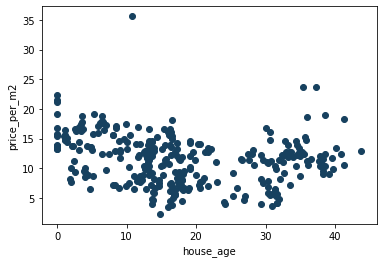

In [21]:
import seaborn as sns
sns.regplot(x=features.iloc[:, 0],
            y=target,
            scatter_kws={'color':'#17415f',  # dark blue dots
                        'alpha':1},  # no transparency for dots
            fit_reg=False);  # no regression line

# alternative
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
#ax.scatter(x=features.iloc[:, 0], 
#            y=target,
#          c='#17415f')  # dark blue dots
#ax.set(xlabel='House age (years)',
#      ylabel='House price (Dollars per square meter)')

Remember that we want to predict the price (y axis) based on the house age (x axis). Traditionally, the data series to be predicted, i.e. the target vector, is shown on the y axis.


**Congratulations:** You have split the real estate investor's data into a feature matrix and a target vector. Now we can train the model on the data. The machine learning algorithm will now actually start learning.


## 4. Model fitting


We chose a machine learning model, set the hyperparameters and split the data into the variables `features` (a `DataFrame`) and `target` (a `Series`). Now we are ready to use the `my_model.fit()` method. It ensures that the linear regression finds the best values for *intercept* and *slope* to match the values of the target vector as closely as possible.

Use the `my_model.fit()` method on the variable `model`, which we created in step 2. As described in the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit), this method takes two arguments: `features` and `target`, i.e. the feature matrix and the target vector. A possible third argument (`sample_weight`) is only relevant for more than one feature. 

```python
model.fit(X=Dataframe,       #features Dataframe
          y=Series,          #target Series
          sample_weight=list #*optional* individual weights for each sample
         )
```

Since you do not have to assign the trained model, you can write 
```python
my_model.fit(features, target).
```
Train `model` with this approach.


In [24]:
model.fit(features, target)

LinearRegression()

In no time at all, the optimal values for *intercept* and *slope* were found so that the vertical squared distance of the data points to the regression line is as small as possible on average. We can imagine this visually:


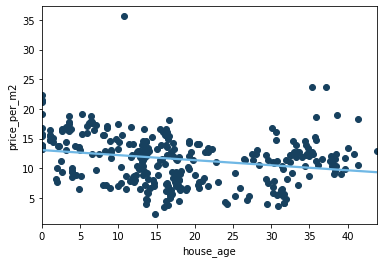

In [26]:
sns.regplot(x=features.iloc[:, 0], 
            y=target,
            scatter_kws={'color':'#17415f',  # dark blue dots
                        'alpha':1},  # no transparency for dots
            line_kws={'color':'#70b8e5'},  # light blue regression line
            ci=None);  # no confidence intervals around line

The linear regression model learns how to make sure the squared vertical distance between the dark blue points and the light blue line is as small as possible on average.

What are the values that the model learned? The visualization already gives us a rough idea. The light blue regression line intersects the y axis just below 15. Then it goes down. The slope should therefore be negative.

In the `sklearn` module, the model parameters are always found as an attribute of the model variable. The attributes that end in an underscore, represent the parameters learned by the model. For example, `my_model.coef_` is the slope. Print this parameter.


In [28]:
print(model.coef_)

[-0.08505421]


As we expected, the value is negative. This means that as a house gets older, its price drops. It can be formulated even more precisely, because the slope can be interpreted directly. An increase of the feature value by 1 leads to a change of the target value by *slope*. In our example: When a property ages by one year, the value of the property decreases by $0.09 per square meter.

How expensive is a square meter in a brand new house? The intercept represents the target value at a feature value of zero. In our example the axis intercept therefore expresses the value of a house that is zero years old. Print the `my_model.intercept_` attribute of `model` to find out exactly what the value is.


In [29]:
print(model.intercept_)

13.072871693016417


The axis intercept is just below 15. This value can also be interpreted directly. A brand new house is worth $13.07 per square meter. The model we have trained can be expressed with this formula:

\begin{equation*}
House price\, \ per\, \ m² = 13.07 \, Dollar - (0.09 \cdot house age)
\end{equation*}

This is no different than in this regression line:


<AxesSubplot:xlabel='house_age', ylabel='price_per_m2'>

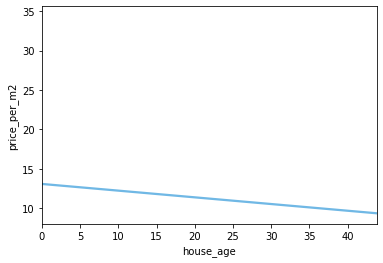

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set(xlim=[0, max(df.loc[:, 'house_age'])],  # limits of x-axis
       ylim=[8, max(df.loc[:, 'price_per_m2'])])  # limits of y-axis

sns.regplot(x=features.iloc[:, 0], 
            y=target,
            scatter=False,  # no dots
            line_kws={'color':'#70b8e5'},  # light blue regression line
            ci=None,  # no confidence intervals around line
            ax=ax)  # draw on Axes ax

**Congratulations:** You have trained your first machine learning model. We can now make predictions with the trained parameters.


## 5. Make predictions with the trained model


For 10 houses, the real estate investor would like to know, how much they are worth. The ages of these houses are:


In [31]:
features_aim = pd.DataFrame({'house_age': [0, 0, 12, 13.3, 34, 3, 15, 27.5, 11, 7]})
features_aim

,house_age
0,0.0
1,0.0
2,12.0
3,13.3
4,34.0
5,3.0
6,15.0
7,27.5
8,11.0
9,7.0


In principle you could put these values into the trained formula and you would get a result:

\begin{equation*}
House price\, \ per\, \ square meter = \frac{$}{years} - (0,09\cdot house age)
\end{equation*}

We can understand this relatively easily with a `DataFrame`.


In [32]:
target_aim_pred = 13.07 - (0.09 * features_aim)
target_aim_pred.values

array([[13.07 ],
       [13.07 ],
       [11.99 ],
       [11.873],
       [10.01 ],
       [12.8  ],
       [11.72 ],
       [10.595],
       [12.08 ],
       [12.44 ]])

A better solution is to use the `my_model.predict()` method, because you can use it for all kinds of models. Otherwise you very quickly lose sight of the bigger picture with very complex models. You give it a `DataFrame` with the feature you want to use for making predictions, in our case `features_aim`. Calculate `target_aim_pred` again with this method and compare the values with the approach above.


In [34]:
target_aim_pred = model.predict(features_aim)
target_aim_pred

array([13.07287169, 13.07287169, 12.05222116, 11.94165069, 10.18102853,
       12.81770906, 11.79705853, 10.7338809 , 12.13727538, 12.47749222])

Note that the brand new houses (the age of the house is zero) have the value of the axis intercept.

We can now visualize the predicted values (orange) together with the values used for the prediction (dark blue).


[Text(0.5, 0, 'House age [years]'),
 Text(0, 0.5, 'Predicted house price per sqaure meter \n[Taiwan Dollar]'),
 (0.0, 43.8),
 (0.0, 35.60606060606061)]

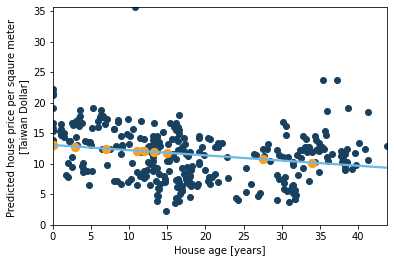

In [35]:
fig, ax = plt.subplots()

sns.regplot(x=features.iloc[:, 0],  # house age in training data set
            y=target,  # prices in training data set
            scatter_kws={'color':'#17415f',  # dark blue dots
                        'alpha':1},  # no transparency for dots
            line_kws={'color':'#70b8e5'},  # light blue regression line
            ci=None,  # no confidence intervals around line
           ax=ax)  # plot on current Axes

sns.regplot(x=features_aim.iloc[:, 0],  # x-values of houses with estimated prices
            y=target_aim_pred,  # estimated prices
            scatter_kws={'color':'#ff9e1c',  # orange dots
                        'alpha':1,  # no transparency for dots
                        's':70},  # dot size
            fit_reg=False,  # no additional regression line
            ci=None,  # no confidence intervals around line
           ax=ax)  # plot on current Axes

ax.set(xlabel='House age [years]',
    ylabel='Predicted house price per sqaure meter \n[Taiwan Dollar]',
      xlim=[0, max(df.loc[:, 'house_age'])],
      ylim=[0, max(df.loc[:, 'price_per_m2'])])

As you can see, the orange dots lie exactly on the light blue regression line. This was to be expected, since the regression line is nothing more than all the possible predictions.


**Congratulations:** You have used a linear regression to predict the value of ten of the investor's houses. You also got a first impression of the Python module `sklearn`. This will accompany you through the entire course. After we have explored how the simple linear regression works in more detail in this lesson, in the following lesson, we will use various features to make predictions and choose the best one.


**Remember:**

There are five steps to making data-driven predictions with `sklearn`:

1. Choose model type
2. Instantiate the model with certain hyperparameters
3. Split data into a feature matrix and target vector
4. Model fitting
5. Make predictions with the trained model


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
